Project 1: Alex and Griffith

In [115]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

In [116]:
def plot_results(TotalCatPop, CatNeutered, RatPop, title):
    """Plot the estimates and the model.
    
    TotalCatPop: Timeseries of the total cat population    
    CatNeutered: Timeseries of neutered cat population simulation results
    RatPop:  TimeSeries of rat population simulation results
    title: string - gives the graph a title
    """
    plot(TotalCatPop, label='Total Cat Population')
    plot(CatNeutered, '--', label='Neutered Cats')
    plot(RatPop, label='Rat Poulation')
    
    decorate(xlabel = 'Year',
             ylabel = 'NYC Population (million)',
            title=title)

In [117]:
def run_simulation(group, rates, timescale, update_func):
    """Simulate the system using any update function. Predicts the cat/rat pop
    
    group: Population of the group in question
    rates: System object - Death rates and growth rates
    timescale: int how far into the future the predictions go
    update_func: function that computes the population for next year
    
    returns: TimeSeries
    """
    pop = TimeSeries() #Stores the population prediction in a TimeSeries
    pop[0]=group
    for year in range(timescale): #Runs through all the years through the end of timescale
        pop[year+1] = update_func(pop[year], year, rates)
    return pop

In [118]:
def population_update_cat(pop, year, rates):
    """Update the rat population for the next year.
    
    populations: State object - Populations of the cats and rat
    pop: current cat population in millions
    year: what year it is
    rates: system object with death and growth rates
    """
    growth = rates.growth_rate_cat - rates.death_rate_cat
    return pop + growth

In [119]:
def run_simulation_rat(ratPop, catPopHistory, rates, timescale, update_func):
    """Simulate the system. Predicts the rat population. 
    
    Uses the by year cat population to predict that years rat population.
    
    ratPop: State object with initial rat population
    catPopHistory: Timeseries with cat pop history
    rates: System object - death rates and growth rates
    timescale: int - how far into the future the predictions go
    update_func: function that computes the population for next year
    
    returns: TimeSeries
    """
    pop = TimeSeries() #Stores the population prediction in a TimeSeries
    pop[0] = ratPop
    for year in range(timescale):
        pop[year+1] = update_func(catPopHistory, pop[year], year, rates)
    return pop

In [120]:
def population_update_rat(catPopHistory, pop, year, rates):
    """Update the rat population for the next year.
    
    catPopHistory: Timeseries with cat population history
    pop: current rat population in millions
    year: what year it is
    rates: system object with death and growth rates
    """
    catPop = catPopHistory[year] #The cat population for that year
    pop_change = rates.rat_coefficient * catPop
    return pop + pop_change

In [155]:
#This cell establishes the model parameters

populations = State(cats_not_neutered=10, cats_neutered = 10, rat=2) #Establishes the cat and rat population
rates = System()#Opens an empty rate System

,values


In [156]:
#This cell allows easy access to change model parameters such as cat population

rates.rat_coefficient = .1 #Establishes the relationship between Rat and Cat population

timescale = 10 #Sets the timescale for the predictions in years
rates.death_rate_cat = 2 #Sets the death rate for cats
rates.growth_rate_cat= 3 #Sets the growth rate for cats

resultsCats_neutered = run_simulation(populations.cats_neutered, rates, timescale, population_update_cat)

,values
0,10
1,11
2,12
3,13
4,14
5,15
6,16
7,17
8,18
9,19


In [154]:
rates.death_rate_cat

2

In [125]:
resultsCats_not_neutered = run_simulation(populations.cats_not_neutered, rates, timescale, population_update_cat)

,values
0,10.0
1,11.0
2,12.0
3,13.0
4,14.0
5,15.0
6,16.0
7,17.0
8,18.0
9,19.0


In [126]:
totalCatPop = resultsCats_neutered + resultsCats_not_neutered
resultsRats = run_simulation_rat (populations.rat, totalCatPop, rates, timescale, population_update_rat)

,values
0,2.0
1,4.0
2,6.2
3,8.6
4,11.2
5,14.0
6,17.0
7,20.2
8,23.6
9,27.2


Saving figure to file figs/project-1.pdf


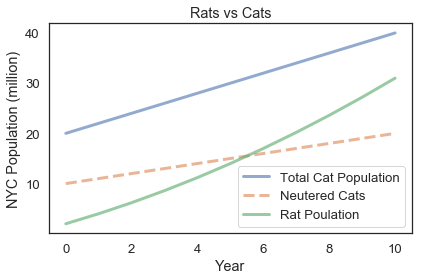

In [127]:
plot_results(totalCatPop, resultsCats_neutered, resultsRats, 'Rats vs Cats')
savefig('figs/project-1.pdf')

***What percentage of the cat population in NYC would have to be neutered to maintain cat and rat populations?***



Data:

 - 17% of Cats disappear over 11 years - 1.54% cat populationa year death rate

To Do:

- Make rat population growth based on cat population
- Make cat population growth based on rat population
- Plug in more reasonable growth rates
- QMRI